# Supervised Learning with Decision Trees: The Iris Dataset


In this guide, we'll explore how decision trees classify data using the classic Iris dataset. We'll cover loading data, training a model, evaluating results, and visualizing the decision-making process. 


**1. Import Libraries**

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# For decision tree visualization
import graphviz # need to install this on your machine, so comment out if you don't have it and don't want to go through the tedious installation process

* **pandas:** For loading and working with tabular data.
* **sklearn.datasets:** Access to built-in datasets.
* **sklearn.model_selection:** To split data into training/testing sets.
* **sklearn.tree:** For building and visualizing decision trees.
* **sklearn.metrics:** Evaluation tools.
* **matplotlib.pyplot:** For plotting.
* **graphviz:** Creates visual graphs of the tree (install with `pip install graphviz`).

**2. Load the Iris Dataset**

In [2]:
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species  (0 - setosa, 1 - versicolor, 2 - virginica)

* The Iris dataset has 150 flower samples.
* **Features (`X`)**: Sepal length/width, petal length/width.
* **Target (`y`)**: Species (0: setosa, 1: versicolor, 2: virginica).

**3. Split Data** 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* We split into  80% training data for model learning, and 20% testing data for evaluation.
* `random_state` ensures the same  split if you re-run the code.

**4. Create and Train the Model**

In [4]:
clf = DecisionTreeClassifier(max_depth=2) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

* We create a decision tree classifier limiting the tree's depth (`max_depth=2`)  to prevent overfitting.
* `.fit` trains the model to learn patterns from the training data.

**5. Predictions and Evaluation**

In [5]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



* The model makes predictions on unseen test data.
* **Accuracy:** The proportion of correct predictions.
* **Confusion Matrix:** Visualizes errors by class.
* **Classification Report:** Gives precision, recall, and F1-score.



**6. Cross-Validation** 

Cross-validation provides a better assessment of the model's performance across different subsets of the data.

In [6]:
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores.mean())


Cross-validation scores: 0.9333333333333332


**7. Feature Importance**

Understanding which features contribute most to decisions can offer insights into the dataset.

In [7]:
importance = clf.feature_importances_
for i, j in enumerate(importance):
    print(f'Feature: {iris.feature_names[i]}, Score: {j:.2f}')


Feature: sepal length (cm), Score: 0.00
Feature: sepal width (cm), Score: 0.00
Feature: petal length (cm), Score: 1.00
Feature: petal width (cm), Score: 0.00


**8. Visualize the Decision Tree** 

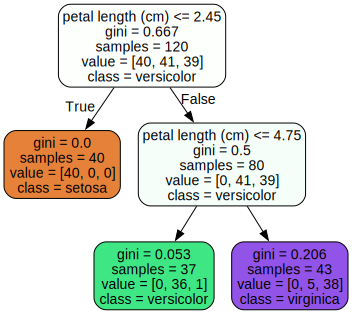

In [9]:
dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names,
                           class_names=iris.target_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree")
graph

**9. Interpreting the Decision Tree**

* **Root Node:** The first decision is based on petal length (cm) <= 2.45, with a Gini impurity of 0.667, suggesting that the starting dataset is quite mixed. There are 120 samples at this node before the split.
* **Left Child of Root Node:** All 40 samples with petal length (cm) <= 2.45 are classified as setosa with a Gini impurity of 0.0, indicating a perfect classification.
* **Right Child of Root Node:** For samples with petal length (cm) > 2.45, further splits are needed as indicated by a Gini impurity of 0.5. There are 80 samples at this node.
* **Left Child of Right Node:** A further split based on petal length (cm) <= 4.75 with a Gini impurity of 0.053, suggesting a good split. Most of these 37 samples are versicolor.
* **Right Child of Right Node:** The remaining samples are predominantly virginica, with a Gini impurity of 0.206. This node has 43 samples.

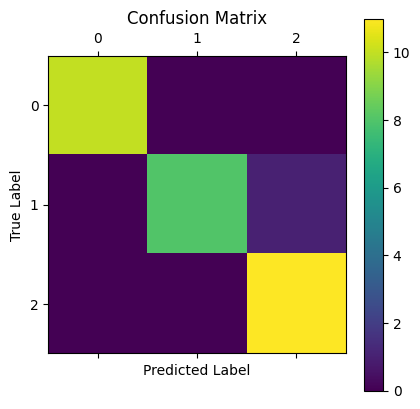

In [10]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**10. Comparing Decision Trees with Logistic Regression**

It's beneficial to compare decision trees to logistic regression to understand their strengths and weaknesses in classification tasks.

Decision Trees: Offer visual interpretability and can handle nonlinear relationships.
Logistic Regression: Provides a probabilistic approach to classification, better suited for linearly separable data.
For a binary classification problem, logistic regression might be more straightforward and less prone to overfitting. However, decision trees excel in handling complex, nonlinear data structures.